# Problem Statement
""For extended data of CO2 emission ("Excercise_Data_1.csv").
Company needs a Regularized Ridge regression model to predict the emission generate from a newly produced car.

# importing the necessery lib

In [110]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

# loading the library 


In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import Normalizer,MinMaxScaler

In [112]:
df = pd.read_csv("C:/Users/SUHAS JADHAV/Desktop/SQL notes/Excercise_Data_1 (1).csv")
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [113]:
df.select_dtypes(exclude=['object'])

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,2.0,4,9.9,6.7,8.5,33,196
1,2014,2.4,4,11.2,7.7,9.6,29,221
2,2014,1.5,4,6.0,5.8,5.9,48,136
3,2014,3.5,6,12.7,9.1,11.1,25,255
4,2014,3.5,6,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...
1062,2014,3.0,6,13.4,9.8,11.8,24,271
1063,2014,3.2,6,13.2,9.5,11.5,25,264
1064,2014,3.0,6,13.4,9.8,11.8,24,271
1065,2014,3.2,6,12.9,9.3,11.3,25,260


In [114]:
df_num = df.select_dtypes(['int','float'])
df_num


,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,2.0,4,9.9,6.7,8.5,33,196
1,2014,2.4,4,11.2,7.7,9.6,29,221
2,2014,1.5,4,6.0,5.8,5.9,48,136
3,2014,3.5,6,12.7,9.1,11.1,25,255
4,2014,3.5,6,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...
1062,2014,3.0,6,13.4,9.8,11.8,24,271
1063,2014,3.2,6,13.2,9.5,11.5,25,264
1064,2014,3.0,6,13.4,9.8,11.8,24,271
1065,2014,3.2,6,12.9,9.3,11.3,25,260


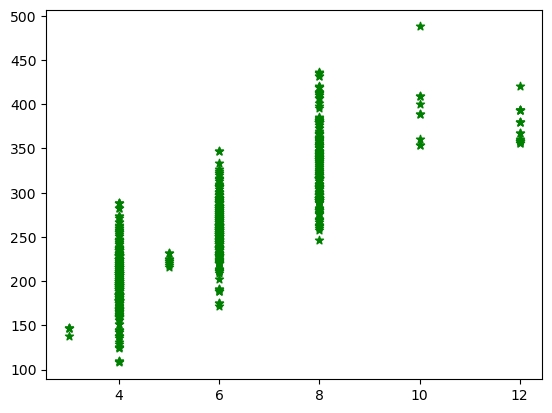

In [115]:
import matplotlib.pyplot as plt
plt.scatter(df_num['CYLINDERS'],df_num['CO2EMISSIONS'],color="green",marker="*")

In [116]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


# Generate plot betwen engine size and emission

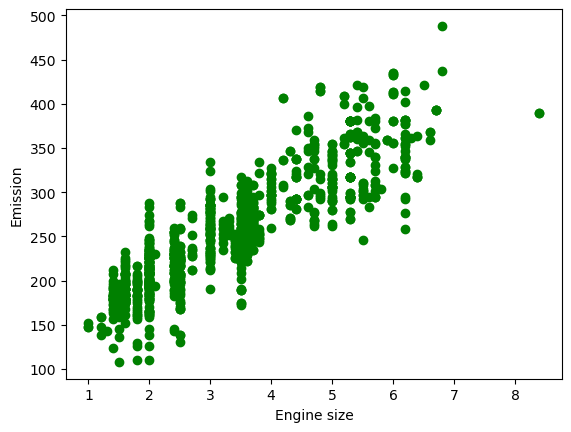

In [117]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='green',marker='o')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

# Lets proceed with selected data

In [118]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ENGINESIZE            1067 non-null   float64
 1   CYLINDERS             1067 non-null   int64  
 2   FUELCONSUMPTION_CITY  1067 non-null   float64
 3   FUELCONSUMPTION_HWY   1067 non-null   float64
 4   FUELCONSUMPTION_COMB  1067 non-null   float64
 5   CO2EMISSIONS          1067 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 50.1 KB


# Check feature names

In [119]:
cdf.columns

Index(['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS'],
      dtype='object')

# Spliting data into Train Test set

In [120]:
df_train,df_test = train_test_split(cdf, train_size=0.7,test_size = 0.3, random_state=100)
y_train = df_train.CO2EMISSIONS
X_train = df_train.drop("CO2EMISSIONS",1)

y_test  = df_test.CO2EMISSIONS
X_test = df_test.drop("CO2EMISSIONS",1)

# Scale the data : scaling the data using standardization and normalizer

In [121]:
features_select=['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']
scaler = StandardScaler()
X_train[features_select] = scaler.fit_transform(X_train[features_select])
X_test[features_select] = scaler.transform(X_test[features_select])

In [122]:
X_train

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB
109,-0.243543,0.102316,-0.204591,-0.324880,-0.263660
1044,-1.083374,-0.988084,-0.806614,-0.924782,-0.858318
590,-0.943403,-0.988084,-0.758452,-0.607187,-0.716733
330,0.176372,0.102316,0.204785,-0.042573,0.104462
345,1.436118,1.192717,1.432912,1.827709,1.576949
...,...,...,...,...,...
802,-1.223346,-0.988084,-0.975181,-0.889493,-0.943269
53,0.596287,1.192717,0.445594,0.627905,0.500901
350,1.436118,1.192717,1.745964,2.110016,1.888437
79,-0.943403,-0.988084,-1.384557,-1.418818,-1.396342


In [123]:
X_test

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB
849,0.106386,0.102316,-0.036025,0.204445,0.047828
244,1.366133,1.192717,0.373351,0.380887,0.387632
30,-0.243543,0.102316,-0.060105,-0.254303,-0.122075
306,1.646076,1.192717,0.662322,0.169157,0.500901
240,1.366133,1.192717,1.481074,1.474826,1.491998
...,...,...,...,...,...
483,-0.663459,-0.988084,-0.782533,-0.924782,-0.830001
966,0.456316,0.102316,0.228866,0.557329,0.359315
894,1.016203,1.192717,0.397432,0.380887,0.387632
23,-0.943403,-0.988084,-0.445400,-0.501322,-0.461879


# Train model and select best alpha values

In [124]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [125]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 20}
-17.27426700241613


# Tabulate model performance on investigated alphas

In [126]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003617,0.000597,0.002920,0.000537,0.0001,{'alpha': 0.0001},-20.039638,-16.279191,-15.191241,-16.783280,...,-17.320155,1.689639,25,-16.109286,-17.560636,-17.560382,-17.296017,-16.757688,-17.056802,0.557121
1,0.004711,0.002726,0.001999,0.000001,0.001,{'alpha': 0.001},-20.038052,-16.279577,-15.189422,-16.783088,...,-17.318920,1.689206,24,-16.109021,-17.558420,-17.560468,-17.296035,-16.757983,-17.056385,0.556796
2,0.000200,0.000400,0.000000,0.000000,0.01,{'alpha': 0.01},-20.030801,-16.284985,-15.176309,-16.781686,...,-17.311354,1.687120,23,-16.109827,-17.545756,-17.561087,-17.296174,-16.762018,-17.054972,0.553953
3,0.003125,0.006250,0.000000,0.000000,0.05,{'alpha': 0.05},-20.031050,-16.293384,-15.155922,-16.779307,...,-17.302492,1.688069,22,-16.120742,-17.536812,-17.563642,-17.296495,-16.771529,-17.057844,0.548148
4,0.000000,0.000000,0.006250,0.007654,0.1,{'alpha': 0.1},-20.035180,-16.296325,-15.148927,-16.778211,...,-17.300776,1.690055,21,-16.125588,-17.535389,-17.565192,-17.296755,-16.776110,-17.059807,0.546074
5,0.002546,0.002255,0.003174,0.002907,0.2,{'alpha': 0.2},-20.037621,-16.298248,-15.146618,-16.777015,...,-17.299886,1.690687,20,-16.128980,-17.535053,-17.567237,-17.297211,-16.779412,-17.061579,0.544931
6,0.004931,0.005487,0.001799,0.001469,0.3,{'alpha': 0.3},-20.038267,-16.298947,-15.146307,-16.776136,...,-17.299463,1.690695,19,-16.130307,-17.535842,-17.568254,-17.297628,-16.780942,-17.062595,0.544680
7,0.006250,0.007654,0.000000,0.000000,0.4,{'alpha': 0.4},-20.038384,-16.299283,-15.146279,-16.775360,...,-17.299119,1.690596,18,-16.131025,-17.536283,-17.568933,-17.298030,-16.781776,-17.063209,0.544585
8,0.003125,0.006251,0.003125,0.006250,0.5,{'alpha': 0.5},-20.038274,-16.299461,-15.146371,-16.774633,...,-17.298809,1.690452,17,-16.131483,-17.536573,-17.569398,-17.298422,-16.782310,-17.063637,0.544544
9,0.006250,0.007655,0.000000,0.000000,0.6,{'alpha': 0.6},-20.038045,-16.299556,-15.146524,-16.773937,...,-17.298519,1.690285,16,-16.131805,-17.536785,-17.569752,-17.298806,-16.782687,-17.063967,0.544531


# Tune to best performing alpha and instantiate Ridge model

In [127]:
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([15.29836668, 13.28384664, 13.91176961,  8.35933548, 12.26243976])

# lets predict the R-squared value

In [128]:
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
print(mean_squared_error(y_train, y_train_pred))

0.8649952679298808
560.0978316176019


In [129]:
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))
print(mean_squared_error(y_test, y_test_pred))

0.8605770535296643
514.2264871371035


# Scale the data : scaling the data using normalization

In [130]:
features_select=['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']
normal = Normalizer()
X_train[features_select] = normal.fit_transform(X_train[features_select])
X_test[features_select] = normal.transform(X_test[features_select])

In [131]:
X_train

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB
109,-0.454842,0.191086,-0.382094,-0.606746,-0.492411
1044,-0.516915,-0.471449,-0.384863,-0.441245,-0.409533
590,-0.517452,-0.541959,-0.416007,-0.333039,-0.393124
330,0.568536,0.329818,0.660125,-0.137235,0.336733
345,0.425986,0.353788,0.425035,0.542141,0.467760
...,...,...,...,...,...
802,-0.541451,-0.437325,-0.431613,-0.393688,-0.417489
53,0.368257,0.736603,0.275192,0.387784,0.309348
350,0.376472,0.312665,0.457696,0.553131,0.495045
79,-0.338965,-0.355019,-0.497471,-0.509782,-0.501706


In [132]:
X_test

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB
849,0.410485,0.394783,-0.138999,0.788842,0.184541
244,0.707963,0.618095,0.193480,0.197385,0.200880
30,-0.622698,0.261605,-0.153679,-0.650209,-0.312123
306,0.747419,0.541567,0.300735,0.076808,0.227440
240,0.434545,0.379384,0.471106,0.469118,0.474580
...,...,...,...,...,...
483,-0.350994,-0.522732,-0.413988,-0.489243,-0.439101
966,0.541244,0.121359,0.271462,0.661058,0.426190
894,0.595859,0.699360,0.233038,0.223336,0.227292
23,-0.593188,-0.621282,-0.280056,-0.315218,-0.290418


# Train model and select best alpha values

In [133]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [134]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 50}
-25.424059670861194


# Tabulate model performance on investigated alphas

In [143]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006066,0.006585,0.001315,0.001094,0.0001,{'alpha': 0.0001},-30.737320,-24.775009,-24.499297,-24.842767,...,-25.845052,2.452270,26,-24.444257,-26.006878,-25.987073,-25.939143,-25.760949,-25.627660,0.598033
1,0.002790,0.001432,0.001400,0.000800,0.001,{'alpha': 0.001},-30.735590,-24.774691,-24.498989,-24.843020,...,-25.844595,2.451642,25,-24.444664,-26.006792,-25.986832,-25.939121,-25.760926,-25.627667,0.597828
2,0.003735,0.006059,0.000000,0.000000,0.01,{'alpha': 0.01},-30.720902,-24.771927,-24.496423,-24.845103,...,-25.840696,2.446323,24,-24.448084,-26.006040,-25.984791,-25.938897,-25.760700,-25.627703,0.596101
3,0.000000,0.000000,0.000000,0.000000,0.05,{'alpha': 0.05},-30.685527,-24.764317,-24.490605,-24.849253,...,-25.831014,2.433631,23,-24.455765,-26.003910,-25.979759,-25.937999,-25.759986,-25.627484,0.592064
4,0.006249,0.007654,0.000000,0.000000,0.1,{'alpha': 0.1},-30.665893,-24.758551,-24.487603,-24.850321,...,-25.825126,2.426803,22,-24.459470,-26.002215,-25.977226,-25.937017,-25.759078,-25.627001,0.589937
5,0.001800,0.001470,0.004654,0.004948,0.2,{'alpha': 0.2},-30.647848,-24.750116,-24.484952,-24.849589,...,-25.818740,2.420948,21,-24.462484,-25.999625,-25.973896,-25.934941,-25.757152,-25.625620,0.587715
6,0.001801,0.001470,0.000921,0.000817,0.3,{'alpha': 0.3},-30.637902,-24.742908,-24.483562,-24.847561,...,-25.814380,2.418080,20,-24.462889,-25.997375,-25.970977,-25.932786,-25.755249,-25.623856,0.586610
7,0.000000,0.000000,0.000000,0.000000,0.4,{'alpha': 0.4},-30.630714,-24.736142,-24.482612,-24.845027,...,-25.810705,2.416232,19,-24.462412,-25.995238,-25.968215,-25.930578,-25.753382,-25.621965,0.585883
8,0.006249,0.007654,0.000000,0.000000,0.5,{'alpha': 0.5},-30.624799,-24.729601,-24.482178,-24.842269,...,-25.807415,2.414820,18,-24.461532,-25.993152,-25.965690,-25.928351,-25.751512,-25.620048,0.585349
9,0.000000,0.000000,0.003125,0.006249,0.6,{'alpha': 0.6},-30.619581,-24.723201,-24.481824,-24.839399,...,-25.804300,2.413666,17,-24.460436,-25.991099,-25.963200,-25.926121,-25.749645,-25.618100,0.584908


# Tune to best performing alpha and instantiate Ridge model

In [144]:
# alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([17.34561005, 34.230989  , 28.67011146, 29.81490561, 29.2012547 ])

In [145]:
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
print(mean_squared_error(y_train, y_train_pred))

0.7364712601600463
1093.3089047324302


In [146]:
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))
print(mean_squared_error(y_test, y_test_pred))

0.7283128003361208
1002.0499338177349
